In [1]:
import matplotlib.pyplot as plt
import os
import random
from glob import glob
import cv2
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)



2024-03-06 10:31:24.470720: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-06 10:31:24.470886: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-06 10:31:24.620738: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version: 2.15.0


In [ ]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from tensorflow.python.platform import _pywrap_tf2
xvfb-run python your_script.py
export DISPLAY=:0


from sklearn import metrics

from tensorflow.keras.models import model_from_json
from PIL import Image, ImageTk
import numpy as np
import cv2

# https://github.com/opencv/opencv/blob/master/data/haarcascades/haarcascade_frontalface_default.xml

def FacialExpressionModel(json_file, weights_file):
    with open(json_file,"r") as file:
        loaded_model_json = file.read()
        model = model_from_json(loaded_model_json)

    model.load.weights(weights_file)
    model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

top =tk.Tk()
top.geometry('800x600')
top.title('Emotion Detector')
top.configure(background='#CDCDCD')

lable1 = Label(top, background='#CDCDCD', font=('arial',15,'bold'))
sign_image= Label(top)

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model_a1.json","model_weights1.h5")


EMOTIONS_LIST = ["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]

def Detect(file_path):
    global Label_packed

    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray_image,1.3,5)
    try:
        for (x,y,w,h) in faces:
            fc = gray_image[y:y+h,x:x+w]
            roi = cv2.resize(fc,(48,48))
            pred = EMOTIONS_LIST[np.argmax(model.predict(roi[np.newaxis,:,:,np.newaxis]))]
            print("Pridicted Emotion is" + pred)
            lable1.configure(foreground="#011638",text = pred)
    except:
        lable1.configure(foreground="#011638",text = "Unable to detect")


def show_Detect_button(file_path):
    detect_b = Button(top,text="Detect Emotion", command= lambda: Detect(file_path),padx=10,pady=5)
    detect_b.configure(background="#364156",foreground='white',font=['arial',10,'bold'])
    detect_b.place(relx=0.79,rely=0.46)


def upload_image():
    try:
        file_path = filedialog.askopenfile()
        uploaded = Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.3),(top.winfo_height()/2.3)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image= im)
        sign_image.image = im
        lable1.configure(text= '')
        show_Detect_button(file_path)
    except:
        pass

upload = Button(top,text="upload Image", command= upload_image,padx=10,pady=5)
upload.configure(background="#364156",foreground='white',font=['arial',20,'bold'])
upload.pack(side='bottom',pady=50)
sign_image.pack(side='bottom',expand='True')
lable1.pack(side='bottom',expand='True')
heading = Label(top,text='Emotion Detector',pady=20,font=['arial',25,'bold'])
heading.configure(background='#CDCDCD',foreground="#364156")
heading.pack()
top.mainloop()



In [ ]:
# Exploring Dataset

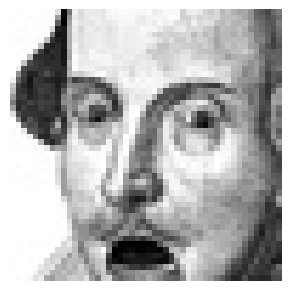

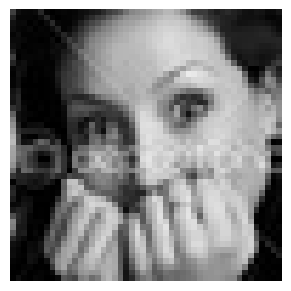

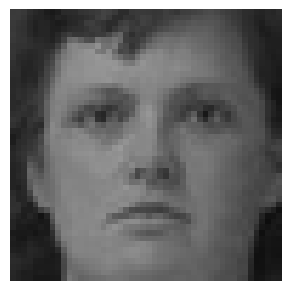

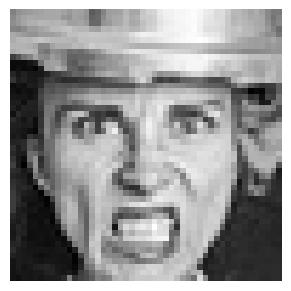

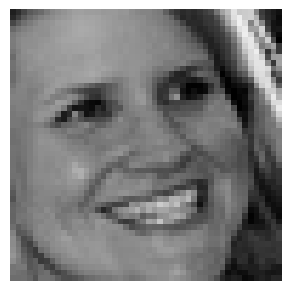

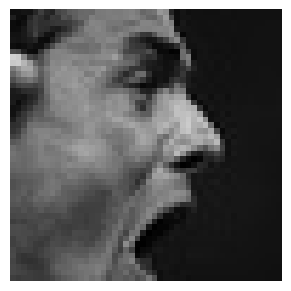

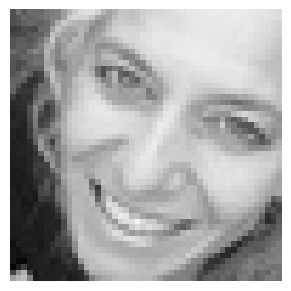

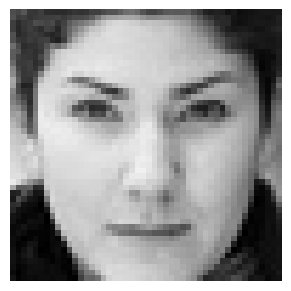

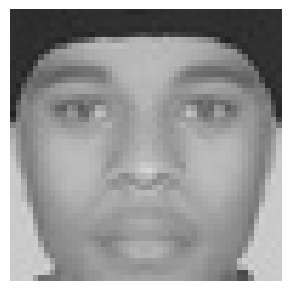

In [3]:
import cv2
import matplotlib.pyplot as plt
import random
from glob import glob

# Make sure to provide the correct path to your image files
images = glob("/kaggle/input/fer2013/train/**/**")

for i in range(9):
    image_path = random.choice(images)
    img = cv2.imread(image_path)

    # Check if image is loaded successfully
    if img is None:
        print(f"Failed to load image: {image_path}")
        continue

    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct display
    plt.axis('off')

plt.show()


In [ ]:
# preparing data for training

In [4]:
img_size=48
batch_size=64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/train/",
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("/kaggle/input/fer2013/test/",
                                              target_size = (img_size,img_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              class_mode = "categorical",
                                              shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Defining Model

In [11]:
#def Convolution(input_tensor, filters, kernel_size):
  x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same"),(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = MaxPooling2D(pool_size= (2,2))(x)
  x = Dropout(0.25)(x)

  return x

In [15]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters=filters, kernel_size=kernel_size, padding="same")(input_tensor)  # Corrected
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    return x


In [16]:
def Dense_f(input_tensor,  nodes):
  x = Dense(nodes)(input_tensor)
  x = BatchNormalization()(x)
  x = Activation('relu')(x)
  x = Dropout(0.25)(x)

  return x

In [17]:

def model_fer(input_shape):
  inputs = Input(input_shape)
  conv_1 = Convolution(inputs,64,(3,3))
  conv_2 = Convolution(conv_1,128,(5,5))
  conv_3 = Convolution(conv_2,512,(3,3))
  conv_4 = Convolution(conv_2,512,(3,3))

  flatten = Flatten()(conv_4)

  dense_1 = Dense_f(flatten,256)
  dense_2 = Dense_f(dense_1,512)

  output = Dense(7,activation = "softmax")(dense_2)
  model = Model(inputs = [inputs], outputs = [output])
    
  opt = Adam(learning_rate=0.0005)

  model.compile(loss = ['categorical_crossentropy'], optimizer = opt , metrics = ['accuracy'])

  return model

In [18]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 48, 48, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18432)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     4,718,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,655,815 (21.58 MB)

 Trainable params: 5,652,871 (21.56 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [ ]:
# Initializing the model

In [19]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

#checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', save_weights_only= True, mode = 'max', verbose = 1)
checkpoint = ModelCheckpoint("model_weights.weights.h5", monitor='val_accuracy', save_weights_only=True, mode='max', verbose=1)

reduce_lr= ReduceLROnPlateau(monitor='val_loss', factor = 0.1,patience = 2,min_learning_rate=0.00001)
callbacks = [checkpoint,reduce_lr]

In [ ]:
# Traninig the Model

In [ ]:
# The next cell takes time to complete

In [27]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2956 - loss: 1.8690
Epoch 1: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 537s 1s/step - accuracy: 0.2958 - loss: 1.8686 - val_accuracy: 0.4141 - val_loss: 1.5629 - learning_rate: 5.0000e-04
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:41 1s/step - accuracy: 0.4375 - loss: 1.6155

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.4375 - loss: 0.8096 - val_accuracy: 0.5000 - val_loss: 0.7413 - learning_rate: 5.0000e-04
Epoch 3/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4516 - loss: 1.4300
Epoch 3: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.4517 - loss: 1.4300 - val_accuracy: 0.4658 - val_loss: 1.4172 - learning_rate: 5.0000e-04
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 7:39 1s/step - accuracy: 0.3906 - loss: 1.4446
Epoch 4: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.3906 - loss: 0.7239 - val_accuracy: 0.4000 - val_loss: 0.9397 - learning_rate: 5.0000e-04
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5174 - loss: 1.2522
Epoch 5: saving model to model_weights.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 519s 1s/step - accuracy: 0.5175 - loss: 1.2522 - val_accuracy: 0.5304 - va

In [21]:
#model.save('model_weights.h5')

In [ ]:
# Model Evaluation

In [22]:
model.evaluate(validation_generator)

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 405ms/step - accuracy: 0.1503 - loss: 6.5523


[6.585229873657227, 0.14920590817928314]

In [ ]:
# plotting Loss

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

NameError: name 'history' is not defined

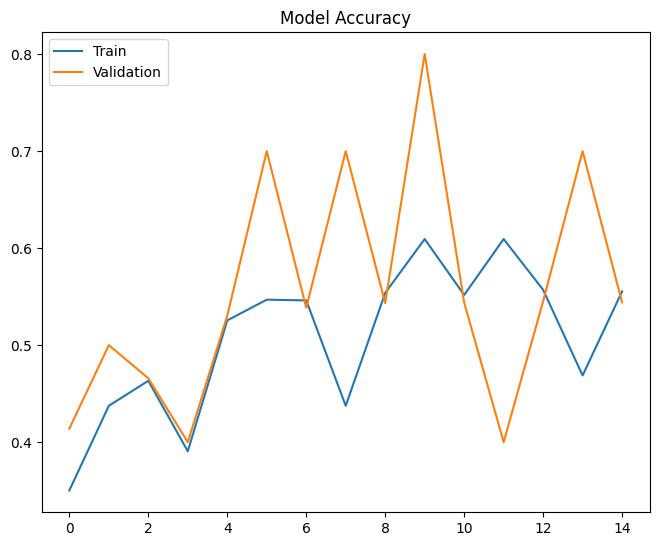

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0.0,hspace=0.25,wspace=0.35)

In [24]:
model_json=model.to_json()
with open("model_a.json","w") as json_file:
  json_file.write(model_json)